In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)

In [2]:
### 4차원 배열 구현
x = np.random.rand(10,1,28,28)
x.shape

(10, 1, 28, 28)

In [3]:
x[0]
x[0].shape

(1, 28, 28)

In [6]:
# 첫번째 데이터의 첫번째 채널
x[0, 0]
x[0][0].shape

(28, 28)

In [7]:
# 첫번째 데이터의 첫번째 채널의 첫번째 세로 값
x[0,0,0]
x[0][0][0].shape

(28,)

In [2]:
from common.util import im2col
from common.util import col2im

In [19]:
### im2col 함수
x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
col1.shape

(9, 75)

In [21]:
x2 = np.random.rand(10,3,7,7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
col2.shape

(90, 75)

In [52]:
pad = 0
stride = 1

W = np.random.rand(10,3,3,3)
x = np.random.rand(1,3,7,7)
b = np.random.rand(10)

N, C, H, w =  x.shape
FN, C, FH, FW = W.shape

out_h = int((H + 2*pad - FH) / stride + 1)
out_w = int((w + 2*pad - FW) / stride + 1)

col = im2col(x, FH, FW, stride=1, pad=0)
col_W = W.reshape(-1, FN)
out = np.dot(col, col_W) + b

out.shape

out.reshape(N, FN, out_h, out_w).shape

(1, 10, 5, 5)

In [3]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.col = None
        self.col_W = None
        
        self.db = None
        self.dW = None
        
    def forward(self, x):
        N, C, H, W =  x.shape
        FN, C, FH, FW = self.W.shape

        out_h = int((H + 2*self.pad - FH) / self.stride + 1)
        out_w = int((W + 2*self.pad - FW) / self.stride + 1)

        col = im2col(x, FH, FW, stride=1, pad=0)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        
        self.x = x
        self.col = col
        self.col_W = col_W
        
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape

        dout = dout.transpose(0,2,3,1).reshape(-1,FN)
        
        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout).T
        self.dW = self.dW.reshape(FN, C, FH, FW)
        
        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)
        
        return dx

In [22]:
x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)

In [41]:
col.shape

(25, 27)

In [47]:
b

array([0.42920228, 0.6348455 , 0.3712686 , 0.7362245 , 0.21084835,
       0.63234625, 0.88890565, 0.16011308, 0.81332721, 0.65235007])

In [54]:
col_W = W.reshape(-1, FN)
col_W

array([[9.37924767e-01, 6.19842492e-01, 2.19439224e-01, 7.92979770e-01,
        8.83464791e-01, 5.15397197e-01, 1.78701830e-01, 6.57282994e-01,
        3.62224032e-01, 5.75819848e-01],
       [4.56812296e-01, 9.69458029e-01, 2.70211979e-01, 3.44304406e-01,
        9.40244487e-01, 2.60884222e-01, 8.78763988e-01, 7.63342035e-01,
        8.34792080e-01, 1.72796755e-02],
       [4.96921572e-01, 8.69137964e-02, 3.32690061e-01, 3.07145566e-01,
        1.83955446e-01, 7.04463134e-01, 6.57081906e-01, 1.50826345e-01,
        5.15582819e-01, 8.83929881e-01],
       [8.48356188e-01, 3.72718577e-01, 4.15362502e-01, 7.67811207e-01,
        6.80601690e-01, 2.95246819e-01, 1.72393999e-01, 3.38336175e-01,
        4.52541449e-02, 4.30215965e-01],
       [3.01752499e-01, 8.48222515e-01, 2.06348422e-01, 5.84783779e-02,
        7.65015370e-01, 3.45708319e-01, 2.42557839e-01, 7.44757263e-01,
        1.66015786e-01, 9.85860148e-01],
       [8.93382984e-01, 1.81693628e-02, 4.97815334e-01, 8.89320817e-01,
   

In [55]:
W.reshape(FN, -1).T

array([[9.37924767e-01, 1.50826345e-01, 7.01228670e-01, 4.21340144e-01,
        4.10124657e-01, 1.88559747e-01, 4.58855623e-01, 3.50358475e-02,
        4.20863305e-01, 8.70908987e-01],
       [6.19842492e-01, 5.15582819e-01, 8.10667347e-01, 3.22816772e-01,
        4.77996924e-01, 6.52522019e-01, 3.34163046e-01, 5.07027415e-01,
        2.80574538e-01, 6.66963727e-01],
       [2.19439224e-01, 8.83929881e-01, 1.02646922e-01, 8.65791378e-01,
        1.88335017e-01, 5.95517045e-02, 6.87972163e-01, 1.94204721e-01,
        9.25573140e-01, 7.59185211e-01],
       [7.92979770e-01, 8.48356188e-01, 9.31652060e-01, 4.48668806e-01,
        8.77385254e-04, 5.79100678e-01, 5.80262363e-01, 6.24704768e-01,
        9.70802102e-01, 9.02762539e-01],
       [8.83464791e-01, 3.72718577e-01, 6.28867794e-01, 5.83237631e-01,
        7.61325485e-01, 1.50144337e-01, 7.05077281e-01, 2.51366937e-01,
        8.68669468e-01, 2.48590328e-01],
       [5.15397197e-01, 4.15362502e-01, 2.82212386e-01, 2.65789163e-01,
   

In [56]:
out.reshape(N, FN, out_h, out_w)

array([[[[8.04360206, 7.63889608, 5.21413019, 7.07073085, 7.87582669],
         [6.85173076, 6.94246455, 5.86963153, 6.14913039, 5.14661672],
         [7.64984125, 7.18752259, 6.07974279, 8.01203998, 8.65941922],
         [7.72344544, 6.88191177, 5.49934458, 5.42315004, 6.61093328],
         [7.98247364, 7.41654277, 6.20267962, 7.49867685, 8.12980564]],

        [[6.75989076, 7.32252807, 5.36173234, 5.99791251, 5.49180271],
         [7.84701673, 8.69170865, 6.48606548, 8.34102837, 9.26589158],
         [7.63850283, 8.1909601 , 6.39872368, 6.83748011, 6.5696713 ],
         [6.68393199, 7.16331842, 5.30367613, 7.41725805, 7.68292634],
         [5.54646939, 6.56078683, 4.7360268 , 5.2104415 , 4.72032336]],

        [[7.151932  , 6.22436299, 5.98664332, 8.57462226, 8.64744714],
         [6.83886832, 6.38895229, 5.91877951, 5.78081482, 5.11059433],
         [6.72362875, 7.41278397, 6.95928711, 8.5782764 , 9.64730894],
         [6.85848835, 7.04458035, 6.07189362, 5.68152599, 6.50266777],
  

In [57]:
out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)

array([[[[8.04360206, 7.64984125, 7.98247364, 7.84701673, 6.68393199],
         [7.151932  , 6.72362875, 8.05218464, 8.77063953, 8.58784557],
         [8.31185979, 7.79965589, 8.50780179, 7.31854542, 7.79887693],
         [8.8127417 , 7.55932568, 7.75760405, 6.50931423, 7.92964561],
         [8.86401328, 7.97565082, 6.74962907, 6.94847492, 7.55870683]],

        [[7.63889608, 7.18752259, 7.41654277, 8.69170865, 7.16331842],
         [6.22436299, 7.41278397, 7.73465554, 9.0134215 , 8.36935263],
         [7.42633321, 8.41631317, 8.80672081, 7.78437901, 8.26163013],
         [8.24134152, 7.75672546, 7.54654803, 7.27187851, 7.65014003],
         [8.37184101, 7.53977569, 5.84515837, 7.3620248 , 6.79676782]],

        [[5.21413019, 6.07974279, 6.20267962, 6.48606548, 5.30367613],
         [5.98664332, 6.95928711, 7.33009404, 7.19530674, 6.32536116],
         [6.67426634, 7.1308845 , 7.39248764, 7.38179757, 7.18015284],
         [7.27150436, 6.53309139, 6.75497788, 6.72077073, 7.30923261],
  

In [63]:
x = np.array([[183,52],[237,72]])
x.shape
x.reshape(1,-1,1,2)

array([[[[183,  52]],

        [[237,  72]]]])

In [4]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None
        
    def forward(self, x):
        N, C, H, W = x.shape

        out_h = int((H - self.pool_h) / self.stride) + 1
        out_w = int((W - self.pool_w) / self.stride) + 1

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)
        
        self.x = x
        self.arg_max = arg_max
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0,2,3,1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((self.arg_max.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()

        dcol = dmax.reshape((dout.shape[0] * dout.shape[1] * dout.shape[2], -1))
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

In [120]:
arg_max = np.array([1,3,2,0,2,0,0,2,0,3,2,0])
dout = np.array([[[2,4],[3,4]],[[4,6],[3,3]],[[4,4],[4,6]]])
pool_h = 2
pool_w =2

pool_size = pool_h * pool_w
dmax = np.zeros((arg_max.size, pool_size))
dmax[np.arange(arg_max.size), arg_max.flatten()] = dout.flatten()

dcol = dmax.reshape((dout.shape[0] * dout.shape[1] * dout.shape[2], -1))
col2im(dcol, x.shape, pool_h, pool_w, stride, pad)



# dmax = dmax.reshape(dout.shape + (4,))

# dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
# print(dcol.shape)

array([[0., 2., 0., 0.],
       [0., 0., 0., 4.],
       [0., 0., 3., 0.],
       [4., 0., 0., 0.],
       [0., 0., 4., 0.],
       [6., 0., 0., 0.],
       [3., 0., 0., 0.],
       [0., 0., 3., 0.],
       [4., 0., 0., 0.],
       [0., 0., 0., 4.],
       [0., 0., 4., 0.],
       [6., 0., 0., 0.]])

In [13]:
from collections import OrderedDict
from common.layers import *

In [25]:
### CNN 구현하기
class SimpleConvNet:
    def __init__(self, input_dim=(1,28,28), conv_param={'filter_num':30, 'filter_size':5, 'stride':1, 'pad':0},
                hidden_size = 100, output_size = 10, weight_init_std = 0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        
        input_size = input_dim[1]
        
        conv_output_size = (input_size + 2*filter_pad - filter_size) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], 
                                           conv_param['stride'], conv_param['pad'])
        self.layers['ReLU1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['ReLU2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        
        self.last_layer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        return np.sum(y == t) / float(x.shape[0])
        
    def gradient(self, x, t):
        self.loss(x, t)
        
        dout=1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db
        
        return grads
    
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [6]:
from dataset.mnist import load_mnist
from common.trainer import Trainer

In [26]:
### MNIST 데이터셋 학습
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

In [27]:
max_epochs = 20
network = SimpleConvNet(input_dim=(1,28,28), conv_param={'filter_num':30, 'filter_size':5, 'stride':1, 'pad':0},
                        hidden_size = 100, output_size = 10, weight_init_std = 0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=max_epochs, mini_batch_size=100,
        optimizer='Adam', optimizer_param={'lr':0.001}, evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.3001975460497004
=== epoch:1, train acc:0.099, test acc:0.1 ===
train loss:2.297884568877683
train loss:2.294144580085019
train loss:2.28874236537616
train loss:2.2794492096388246
train loss:2.260991556704645
train loss:2.2581589861215376
train loss:2.2509241598823757
train loss:2.2195955161224314
train loss:2.1937674780684837
train loss:2.156866320116008
train loss:2.129945127971525
train loss:2.0759026199886477
train loss:2.0067197713565257
train loss:1.9850588294643794
train loss:1.9054114780081821
train loss:1.7991439993850247
train loss:1.8051192965094234
train loss:1.6965389675886542
train loss:1.7183245773742146
train loss:1.5734500388183255
train loss:1.5386480389894428
train loss:1.4059873785774473
train loss:1.2022958678021822
train loss:1.1514447793652582
train loss:1.1722805478404497
train loss:1.0035796073663321
train loss:0.9131788140495101
train loss:1.0172102660281543
train loss:0.8802299932975014
train loss:0.8844607322382889
train loss:0.8031171096649128


train loss:0.286025414874753
train loss:0.26000453939223545
train loss:0.2563483490971048
train loss:0.1457198035086202
train loss:0.11620717438880787
train loss:0.1472049736083802
train loss:0.28948154427365214
train loss:0.2186429971580412
train loss:0.09426918957761832
train loss:0.2158136986869533
train loss:0.26526832357740737
train loss:0.28241145309777144
train loss:0.21304287106360126
train loss:0.2044699545320665
train loss:0.2528013697381981
train loss:0.2736032109018526
train loss:0.1955504182748017
train loss:0.22291197465838766
train loss:0.22054348353200207
train loss:0.2911871983162405
train loss:0.17942033376555883
train loss:0.22386185550532298
train loss:0.25883792226588487
train loss:0.2268887835251103
train loss:0.12651151181246967
train loss:0.17339012815986987
train loss:0.19598088164342972
train loss:0.26965779327356987
train loss:0.2162650203715653
train loss:0.26100924550716276
train loss:0.18705872250803904
train loss:0.1311711936235201
train loss:0.1164803811

train loss:0.10696065063143259
train loss:0.06510768310562351
train loss:0.0683865305153168
train loss:0.11913548665215164
train loss:0.0756790401478385
train loss:0.1528250381974386
train loss:0.1044445966774299
train loss:0.1688645649461617
train loss:0.2619968867736259
train loss:0.0940675840570907
train loss:0.13706796151461254
train loss:0.06981506924959327
train loss:0.09838080492687717
train loss:0.08772862464666749
train loss:0.1977101068627487
train loss:0.1055099907973144
train loss:0.11380327713640898
train loss:0.09358013556675177
train loss:0.18534864841500004
train loss:0.13001975700563106
train loss:0.08013386948969456
train loss:0.06795294683550979
train loss:0.10631080443534938
train loss:0.20085145043620853
train loss:0.049488036284596894
train loss:0.16129277975818287
train loss:0.10249582301149715
train loss:0.17044523059615238
train loss:0.09594890420929061
train loss:0.08596109114206357
train loss:0.0968043377796866
train loss:0.13655683248250614
train loss:0.0967

train loss:0.0675059641077297
train loss:0.04509359305224463
train loss:0.08436072428978175
train loss:0.11701187411057284
train loss:0.14441654937561008
train loss:0.06974891123172727
train loss:0.07070915614728455
train loss:0.10988232319328904
train loss:0.1652549630542152
train loss:0.1027191219046461
train loss:0.074407507293453
train loss:0.11766880813977455
train loss:0.051702549791023504
train loss:0.0374941902441157
train loss:0.07470006988852146
train loss:0.08547121199620557
train loss:0.0947450883264931
train loss:0.14354207991580956
train loss:0.16726635597975545
train loss:0.11452287798813482
train loss:0.13600146243217626
train loss:0.035377260631830575
train loss:0.04466218737516791
train loss:0.08293576578391795
train loss:0.04507254995176511
train loss:0.08639481966069812
train loss:0.05214935110954219
train loss:0.12787824589518942
train loss:0.05994798178148362
train loss:0.12766323162238907
train loss:0.07025766594602773
train loss:0.04772253405620526
train loss:0.

train loss:0.1087359835852132
train loss:0.1809092375362541
train loss:0.10305332076617411
train loss:0.058131526240533846
train loss:0.14506448026990862
train loss:0.05296371403811124
train loss:0.08466895687263713
train loss:0.046120873860821726
train loss:0.0960711823676289
train loss:0.09745957929488908
train loss:0.020853668429834066
train loss:0.050656170061371276
train loss:0.07809831537333797
train loss:0.17137129972030976
train loss:0.044704301866347614
train loss:0.08210242521310623
train loss:0.024748542156500474
train loss:0.04434576716562707
train loss:0.08614482996344833
train loss:0.13181638237873153
train loss:0.08893791932649718
train loss:0.0449570264798772
train loss:0.08965402547535233
train loss:0.05236211666732526
train loss:0.0726614051589696
train loss:0.04248429513212188
train loss:0.08092092856448159
train loss:0.05116015447407952
train loss:0.07694892781393428
train loss:0.08474416458355527
train loss:0.03974101559934393
train loss:0.13269506070751527
train l

train loss:0.04445669541574907
train loss:0.07528344577723829
train loss:0.04672704224169717
train loss:0.16321198342414156
train loss:0.021861361498118632
train loss:0.04252454939524193
train loss:0.07349368543072739
train loss:0.027711218557949356
train loss:0.025624617270000264
train loss:0.04070323244817442
train loss:0.033746943517224445
train loss:0.046045309051628285
train loss:0.11100355213462249
train loss:0.06053644170256049
train loss:0.027535130462321426
train loss:0.0674692237746758
train loss:0.017196533997601904
train loss:0.014621770006662342
train loss:0.0660268166516239
train loss:0.049239386854406694
train loss:0.02504360721470056
train loss:0.02446904579205166
train loss:0.04591714779467062
train loss:0.055003196842415454
train loss:0.024753004760789545
train loss:0.0246876936584892
train loss:0.06975478107216562
train loss:0.029412583427646712
train loss:0.07200650666067444
train loss:0.052389645807170176
train loss:0.04034613862107786
train loss:0.0691544020502246

train loss:0.01369279200192402
train loss:0.03147267164191849
train loss:0.08857663651341596
train loss:0.02342964001532453
train loss:0.13866066638087735
train loss:0.08922721472682243
train loss:0.06059254698620856
train loss:0.021224817751109105
train loss:0.11625091996649768
train loss:0.07487381830392445
train loss:0.019361101346761115
train loss:0.0476605524874633
train loss:0.042733521296835934
train loss:0.07261277004399981
train loss:0.06149947238491966
train loss:0.0781355065156334
train loss:0.03700174965940468
train loss:0.057298338481663394
train loss:0.010213846851569444
train loss:0.062107800515496026
train loss:0.031821457902287284
train loss:0.04202896057813424
train loss:0.02981874072993775
train loss:0.056156436231809125
train loss:0.020698529312412683
train loss:0.08738624134366027
train loss:0.07973331440090173
train loss:0.022576326596517905
train loss:0.012319500883856417
train loss:0.015272644510496917
train loss:0.024622148842932578
train loss:0.009825830094863

train loss:0.006886323484652964
train loss:0.027449623046273
train loss:0.036400729445358763
train loss:0.06386364986752453
train loss:0.02696916469900804
train loss:0.09124992995195326
train loss:0.047592585721571955
train loss:0.020185345173607715
train loss:0.08348575778668672
train loss:0.08866822463992
train loss:0.026008559766403275
train loss:0.027127133083407383
train loss:0.029477860958149974
train loss:0.006357802028819974
train loss:0.03933407352352787
train loss:0.03595080683187309
train loss:0.09558484676309696
train loss:0.08517111593075093
train loss:0.11029676842423598
train loss:0.019111638512181214
train loss:0.005439685322980139
train loss:0.02803069166087683
train loss:0.03493321740202621
train loss:0.01599199098823798
train loss:0.027035181877809157
train loss:0.021691638749296516
train loss:0.008831480027774364
train loss:0.013672868842389994
train loss:0.04442151549745909
train loss:0.050502298539819315
train loss:0.027420123293496034
train loss:0.025087025296565

train loss:0.03429676035245173
train loss:0.162613242146729
train loss:0.021095381018004754
train loss:0.047233062466019396
train loss:0.03316448058553235
train loss:0.03770825506915884
train loss:0.03560937093910633
train loss:0.021953015609629735
train loss:0.04826087920851335
train loss:0.010850018255781921
train loss:0.029798274903435416
train loss:0.0717899677087494
train loss:0.029831439343406988
train loss:0.030372157890025266
train loss:0.045046398028199694
train loss:0.016503169163667807
train loss:0.062336556490211706
train loss:0.04953646811732156
train loss:0.029054702607944575
train loss:0.011394357374687565
train loss:0.05094875423171742
train loss:0.029077803217830198
train loss:0.01825769035950529
train loss:0.020509857699042816
train loss:0.04538765041940938
train loss:0.07009598108732379
train loss:0.06017980747619937
train loss:0.038139193168511935
train loss:0.012678935381841944
train loss:0.017075756357432765
train loss:0.03758812888611958
train loss:0.036086815555

train loss:0.05233713443036315
train loss:0.01209840135451745
train loss:0.025149558356618584
train loss:0.09975523343436775
train loss:0.04379241644605453
train loss:0.012666422696072726
train loss:0.010805485482936346
train loss:0.022991501409089465
train loss:0.011269557994146286
train loss:0.03556174666042156
train loss:0.012356341415965819
train loss:0.005982304980937941
train loss:0.03219775634042215
train loss:0.03890998870828293
train loss:0.008035834926056412
train loss:0.033175236976671296
train loss:0.08623648382279761
train loss:0.016241336318355473
train loss:0.02703075459787883
train loss:0.0742646699402099
train loss:0.014040986047131849
train loss:0.04267497235765834
train loss:0.029588148214565034
train loss:0.06339623461726025
train loss:0.022831390633411584
=== epoch:5, train acc:0.985, test acc:0.979 ===
train loss:0.03239390450787179
train loss:0.03400817277782151
train loss:0.012223341002571919
train loss:0.030792014625577558
train loss:0.009364877653804102
train 

train loss:0.006056343203652104
train loss:0.016424494218940357
train loss:0.034008810074243286
train loss:0.006962821335059237
train loss:0.00656635227633986
train loss:0.017441528361312714
train loss:0.050281546894809834
train loss:0.008085759734994357
train loss:0.04498931387198352
train loss:0.01742342158395297
train loss:0.013499881705025564
train loss:0.004831348891616325
train loss:0.030728651360902255
train loss:0.016264842429056955
train loss:0.019197876915002132
train loss:0.029208156595200346
train loss:0.009224546924925865
train loss:0.017563224506039563
train loss:0.006165840404651737
train loss:0.01946551027463794
train loss:0.02435873702225363
train loss:0.018405611320532013
train loss:0.009592536929445667
train loss:0.025985135813594306
train loss:0.027186429576660356
train loss:0.15846995347283516
train loss:0.03098302165800775
train loss:0.01651793213890432
train loss:0.033449660659408104
train loss:0.07618429623614507
train loss:0.012932833802308263
train loss:0.0342

train loss:0.005635852003038611
train loss:0.017593747436821242
train loss:0.01751315856819915
train loss:0.003324753577936026
train loss:0.05571073302447331
train loss:0.03752888687766185
train loss:0.02876247976449332
train loss:0.03163006891419547
train loss:0.05822722678443566
train loss:0.010441674225958477
train loss:0.07164493085252457
train loss:0.02323738905070181
train loss:0.01845596969535445
train loss:0.0061948007120939475
train loss:0.026839021338111987
train loss:0.017343849299107074
train loss:0.018320136237170118
train loss:0.025375230953638722
train loss:0.07378947224385367
train loss:0.042279518001381744
train loss:0.0419024920558266
train loss:0.015978144429499783
train loss:0.063350673376859
train loss:0.012636890282574507
train loss:0.020568254497495712
train loss:0.06945009093907126
train loss:0.02912701172535244
train loss:0.016847181832509835
train loss:0.014706640567175544
train loss:0.01217115595161623
train loss:0.014187725800842172
train loss:0.024694152210

train loss:0.011168066621368013
train loss:0.017331216481742705
train loss:0.011247898308208328
train loss:0.02678776741423543
train loss:0.1780830779935927
train loss:0.012959295928022559
train loss:0.009362895322676496
train loss:0.014283595229333397
train loss:0.020299448265147527
train loss:0.02282952460849873
train loss:0.09066229652628893
train loss:0.004404968942987877
train loss:0.008219773446518298
train loss:0.005868219906404605
train loss:0.06231883511841963
train loss:0.0866703353070682
train loss:0.03684092915409893
train loss:0.0329486790901399
train loss:0.023498445775456404
train loss:0.006469010846756391
train loss:0.012534266696447291
train loss:0.011826728938317146
train loss:0.01465846785994378
train loss:0.012513272561929533
train loss:0.013836180122792488
train loss:0.00707242514445566
train loss:0.03170085218939973
train loss:0.005183649267426625
train loss:0.020026682261347704
train loss:0.021465732750629938
train loss:0.0101281966484594
train loss:0.02455758518

train loss:0.03483742245349777
train loss:0.00337928898843617
train loss:0.03914944151877423
train loss:0.0290462464687237
train loss:0.003044589494373717
train loss:0.013295007214676273
train loss:0.003328387617652367
train loss:0.040326625465779344
train loss:0.019452475708165284
train loss:0.023188518501022926
train loss:0.010801737494287233
train loss:0.011773342716451883
train loss:0.029533248996602156
train loss:0.011148776070367567
train loss:0.021060947533912088
train loss:0.01635594203414704
train loss:0.013216765822651038
train loss:0.0578545747022218
train loss:0.008807631231903356
train loss:0.030071047877302425
train loss:0.01268978128722873
train loss:0.014643786198201366
train loss:0.022398367846317796
train loss:0.07163876407317499
train loss:0.04532600156198288
train loss:0.03067053290362195
train loss:0.019022538576468444
train loss:0.043544773585849975
train loss:0.032943115396763506
train loss:0.015978720953318287
train loss:0.020706002412811602
train loss:0.0468569

train loss:0.017190576469413486
train loss:0.007922146075298304
train loss:0.04203922871123418
train loss:0.01444508898189182
train loss:0.006841400412755012
train loss:0.04685029307697146
train loss:0.0070977897288471755
train loss:0.008865004064858411
train loss:0.010991644580396732
train loss:0.0028331025607828964
train loss:0.03699611089760161
train loss:0.012809279025754208
train loss:0.035300337870620806
train loss:0.025763804537865545
train loss:0.001906937254181608
train loss:0.007375654342007457
train loss:0.00133404749135903
train loss:0.006333425243215642
train loss:0.05071812541756424
train loss:0.007759658738291062
train loss:0.016737621037230522
train loss:0.022746163643584758
train loss:0.0031371295443038843
train loss:0.004773023635653339
train loss:0.015057445842213645
train loss:0.0027029548828806245
train loss:0.0073617340216367315
train loss:0.006554096224781068
train loss:0.01062892165225278
train loss:0.029200096928712393
train loss:0.013921102380846739
train loss

train loss:0.008262545901221168
train loss:0.04464695705500785
train loss:0.0023135182853129487
train loss:0.009452095900058114
train loss:0.030283039336140963
train loss:0.031036502691165476
train loss:0.006331738873090295
train loss:0.013921748631551425
train loss:0.012565885138952994
train loss:0.012585299338216803
train loss:0.021445115613114112
train loss:0.013063011488168045
train loss:0.02442314839412058
train loss:0.023024475462365447
train loss:0.010530692228355476
train loss:0.007791952124390922
train loss:0.0020947518457100052
train loss:0.017081219631669843
train loss:0.007110135485179445
train loss:0.010837670641678706
train loss:0.0031819416405831236
train loss:0.017703257195697555
train loss:0.022344429516515576
train loss:0.010652979355199946
train loss:0.010438360951534277
train loss:0.007051533867351294
train loss:0.00465288249552084
train loss:0.0067812941845777856
train loss:0.01874573311846722
train loss:0.0026958413584738457
train loss:0.007493131265147406
train l

train loss:0.04692654759281679
train loss:0.010399123940104402
train loss:0.004274708210031605
train loss:0.0010892652115269445
train loss:0.027105151947361756
train loss:0.024155284069211698
train loss:0.007407589642280322
train loss:0.10455791173669139
train loss:0.0023143527066156314
train loss:0.03194709740284522
train loss:0.0023751644367080793
train loss:0.008449840744608025
=== epoch:8, train acc:0.995, test acc:0.986 ===
train loss:0.01637743244392391
train loss:0.001542153056070842
train loss:0.009774537228642683
train loss:0.01444924523722508
train loss:0.016220822193963223
train loss:0.005452341301236579
train loss:0.004491653605011984
train loss:0.002492549543480271
train loss:0.01791155794020151
train loss:0.009811783255431035
train loss:0.004912922192223552
train loss:0.007483482943589546
train loss:0.007171385247706363
train loss:0.007157106383986355
train loss:0.002303288213659724
train loss:0.009076659842019816
train loss:0.009297886930531312
train loss:0.0036409377695

train loss:0.005633114665323553
train loss:0.005692035547576295
train loss:0.008623422169391562
train loss:0.012578907153756343
train loss:0.0030037932428581483
train loss:0.02673157431358832
train loss:0.007147682142949963
train loss:0.016771288706970845
train loss:0.01456762569938171
train loss:0.027322364931920185
train loss:0.009708813745201189
train loss:0.0025035360499349305
train loss:0.004561712823798959
train loss:0.007967011457831632
train loss:0.005021294713140882
train loss:0.014837081536757746
train loss:0.011562260585048008
train loss:0.005065620928011007
train loss:0.0838688433894593
train loss:0.004136884062456978
train loss:0.011364402653590611
train loss:0.007828025887232798
train loss:0.0037880158950216545
train loss:0.0028187756210456766
train loss:0.006746564292590911
train loss:0.007679974732690142
train loss:0.0015168901102101673
train loss:0.004252586780699841
train loss:0.014441145214755743
train loss:0.014585588314701721
train loss:0.0006676116702935574
train 

train loss:0.00865646574330966
train loss:0.002264141298108605
train loss:0.0024234192064700667
train loss:0.005002595055402406
train loss:0.02291472210563041
train loss:0.0038760756445703993
train loss:0.0012686519273591317
train loss:0.006936232995199167
train loss:0.005459949714773059
train loss:0.0037759656818057872
train loss:0.002352276265990095
train loss:0.004253573091520307
train loss:0.01161037511359046
train loss:0.022692088481814747
train loss:0.0014525122540009266
train loss:0.0039413351906294886
train loss:0.004777598461824945
train loss:0.012664875832067924
train loss:0.0015306125208251295
train loss:0.005947088129104681
train loss:0.0021323583121444834
train loss:0.000961363704243523
train loss:0.018598838285892295
train loss:0.0038387381852765935
train loss:0.003935600410653676
train loss:0.013718868007570731
train loss:0.008046105020789552
train loss:0.004451599921684806
train loss:0.00351424260297187
train loss:0.002036701049499533
train loss:0.054672908276802386
tra

train loss:0.0061245901392827495
train loss:0.001403604798021314
train loss:0.023750441370851475
train loss:0.007975515535767235
train loss:0.009040662110114884
train loss:0.014511019105594413
train loss:0.018339061430652892
train loss:0.06871422718647734
train loss:0.0037767254500689225
train loss:0.003487523887657615
train loss:0.006998661763985302
train loss:0.012756920154213734
train loss:0.009199952629661045
train loss:0.004131386743676319
train loss:0.010280307653864474
train loss:0.005189219595076288
train loss:0.03670305585850048
train loss:0.017574520912593525
train loss:0.012545071658069411
train loss:0.004580797120162342
train loss:0.00562298641562367
train loss:0.00609304358088263
train loss:0.008666681610617984
train loss:0.006587726335932864
train loss:0.0067081300957163815
train loss:0.006728025699358771
train loss:0.009723915344857666
train loss:0.0026025839109798513
train loss:0.0016711474640098663
train loss:0.0016212950251557683
train loss:0.018350216248584746
train 

train loss:0.026570511470412075
train loss:0.0018420633852629631
train loss:0.009418852068992374
train loss:0.0024706512601599348
train loss:0.01988323520823097
train loss:0.0008462116843174327
train loss:0.005031868909822933
train loss:0.0018605817029253328
train loss:0.014927921196809146
train loss:0.004376208484280406
train loss:0.0022330368311909766
train loss:0.016668042247348268
train loss:0.0013290554070840628
train loss:0.044107545870394456
train loss:0.015301305223191286
train loss:0.030668999094157576
train loss:0.01614617155968905
train loss:0.0162276675295633
train loss:0.019839425599932875
train loss:0.005696582373150412
train loss:0.020958742051755422
train loss:0.01731398204188967
train loss:0.0041395470339911575
train loss:0.0070690369631056845
train loss:0.008376643171326562
train loss:0.006522317940306514
train loss:0.002028044887661061
train loss:0.0045382524915144025
train loss:0.0036532982554284225
train loss:0.0009137636565346355
train loss:0.0027691066692848744
t

train loss:0.011475554945146283
train loss:0.012181837908232782
train loss:0.03256104592252097
train loss:0.0044073195145405124
train loss:0.005964912281694687
train loss:0.008377377601031358
train loss:0.003630679483860178
train loss:0.014176321225872902
train loss:0.006926804628396666
train loss:0.0020906185300657194
train loss:0.004909490864905817
train loss:0.01290388893619329
train loss:0.0093993639444305
train loss:0.005826796545702086
train loss:0.01130885138389603
train loss:0.042724048363408144
train loss:0.002436822662348861
train loss:0.004914568233069238
train loss:0.009276622227147263
train loss:0.005787772939184124
train loss:0.0010315924327636177
train loss:0.009130350268627569
train loss:0.0009753754355332198
train loss:0.003334904297187472
train loss:0.016997797697657607
train loss:0.004416507112579104
train loss:0.009528507662134682
train loss:0.0009296057340195277
train loss:0.002317241926234815
train loss:0.00955407968610941
train loss:0.004547169243129081
train los

train loss:0.008976987913220357
train loss:0.0024396366611589546
train loss:0.003586033820144357
train loss:0.0020519672508753856
train loss:0.01235523721595609
train loss:0.0024005951120218342
train loss:0.0003446841249111554
train loss:0.010732380319230697
train loss:0.0027484439188773073
train loss:0.0015980873404812372
train loss:0.0015559367927184553
train loss:0.001341271707162202
train loss:0.019389465934216032
train loss:0.002645187909543465
train loss:0.0009191635755262921
train loss:0.0018539842020667257
train loss:0.005557936051157568
train loss:0.0008916220450227219
train loss:0.0194447931972714
train loss:0.00486085291125387
train loss:0.0011654898402450571
train loss:0.0025153936802447584
train loss:0.001403070198634423
train loss:0.0013993804393804424
train loss:0.0005818056794031325
train loss:0.0025728704677628216
train loss:0.022888268333256773
train loss:0.002004702148587605
train loss:0.02763552259290585
train loss:0.01522991596580717
train loss:0.003157847930607422

train loss:0.005476539978531555
train loss:0.0020711462922397643
train loss:0.004335683102790629
train loss:0.004046564573384325
train loss:0.0020375421815086365
train loss:0.0009349557363171726
train loss:0.01241670826604923
train loss:0.002962497912431558
train loss:0.0006113174205737857
train loss:0.00245113198329876
train loss:0.004124861592521039
train loss:0.00046876567837999926
train loss:0.006772473050882319
train loss:0.0009429039397510612
train loss:0.014087744191788668
train loss:0.0027698721407376785
train loss:0.004817863556822481
train loss:0.006288395933795468
train loss:0.0007908448299959434
train loss:0.002327792324887917
train loss:0.015353833865225213
=== epoch:11, train acc:0.994, test acc:0.987 ===
train loss:0.0032955231774689643
train loss:0.0124379422963356
train loss:0.004851966110616489
train loss:0.002381609847091506
train loss:0.011645582614728039
train loss:0.009140475405577091
train loss:0.032500533078455185
train loss:0.0014855338848265244
train loss:0.01

train loss:0.004323211523863318
train loss:0.012955174089494571
train loss:0.0010069265564761145
train loss:0.010682594088690387
train loss:0.013158910457487311
train loss:0.0006497815585084846
train loss:0.014091797803391669
train loss:0.00118244524028881
train loss:0.004678567416525457
train loss:0.00557524601086704
train loss:0.00775514904921675
train loss:0.001985464049129535
train loss:0.013328029052327488
train loss:0.004684187016939477
train loss:0.0037638800644532707
train loss:0.07971980814697617
train loss:0.02270463091599711
train loss:0.005708898869686482
train loss:0.003917616569281277
train loss:0.0008905285467771243
train loss:0.0010189731850852929
train loss:0.002179673960317225
train loss:0.0006006070443908245
train loss:0.0027108290010531434
train loss:0.0022267572907754586
train loss:0.014708459320665961
train loss:0.005165262461925487
train loss:0.008998196826279703
train loss:0.006441427738509935
train loss:0.005130361015793439
train loss:0.005141882571932802
train

train loss:0.021306448086072457
train loss:0.002904665570674342
train loss:0.004207669829773046
train loss:0.0052886634096163555
train loss:0.0013842389028287231
train loss:0.005645762047719045
train loss:0.004991438337773376
train loss:0.01813847796063357
train loss:0.0015083448689994625
train loss:0.005153875893100208
train loss:0.018050432777073255
train loss:0.00904495953930469
train loss:0.005637316902825953
train loss:0.004182605592813988
train loss:0.002255605206525287
train loss:0.00962071864281208
train loss:0.00522711533707841
train loss:0.042734685302286295
train loss:0.003041703000044581
train loss:0.001046864542244852
train loss:0.0075828751910734645
train loss:0.0005323762245239295
train loss:0.01769889852194594
train loss:0.010418767130443764
train loss:0.0003757423954114544
train loss:0.00500134375384868
train loss:0.0010305621000659669
train loss:0.00662878685994566
train loss:0.0034882786267129867
train loss:0.004294281890397275
train loss:0.001280027222801115
train l

train loss:0.0012940533294326009
train loss:0.00015687727488676223
train loss:0.0005576242172425094
train loss:0.002901783920272023
train loss:0.00884785148350403
train loss:0.0022702580731599952
train loss:0.012450837841530274
train loss:0.002254768211396651
train loss:0.0009200989257284221
train loss:0.0005191485063860314
train loss:0.004957129303052984
train loss:0.01725147984218236
train loss:0.0019498117026687813
train loss:0.0018068895588131443
train loss:0.012012700159272862
train loss:0.0035037078938437672
train loss:0.00041295982852184256
train loss:0.000783491755776114
train loss:0.0007449339355278654
train loss:0.03515295667938396
train loss:0.017649437734409235
train loss:0.0005068881876123883
train loss:0.009061283609620807
train loss:0.0037200118430041652
train loss:0.004536850543095475
train loss:0.00035049171208354586
train loss:0.0014119332242695814
train loss:0.0009139559205292544
train loss:0.006763298704049239
train loss:0.01600594278562516
train loss:0.001024289681

train loss:0.06159750829025068
train loss:0.0006323455342642579
train loss:0.0020535510802484006
train loss:0.007076237974603887
train loss:0.008884916989891415
train loss:0.001180733504814605
train loss:0.0011139696601351779
train loss:0.00041418931293600364
train loss:0.002249547559077776
train loss:0.0019715690434526957
train loss:0.013710610444880904
train loss:0.001724381135808972
train loss:0.0006370619750609606
train loss:0.003893831880201704
train loss:0.008897071864274415
train loss:0.0002958462833811542
train loss:0.003342519700631475
train loss:0.004279038721582989
train loss:0.0009965285335677215
train loss:0.0018806259280322154
train loss:0.0004921508072926685
train loss:0.006024930662440808
train loss:0.0004442304628568102
train loss:0.0036114519262490136
train loss:0.0030622504373042387
train loss:0.0008489298817814214
train loss:0.0009752124603722788
train loss:0.0009003553305560162
train loss:0.00027264419027929053
train loss:0.003485325015698937
train loss:0.001406097

train loss:0.0022976164369185852
train loss:0.0012424671036614012
train loss:0.00023523382773176106
train loss:0.005004975894803362
train loss:0.0004455895038954763
train loss:0.00047218025922618435
train loss:0.002557458939292591
train loss:0.006101234786787036
train loss:0.005000661525630617
train loss:0.0020681571996011942
train loss:0.0015176839226933839
train loss:0.004445864421426981
train loss:0.001236826308537412
train loss:0.005173012368441774
train loss:0.00018717455524960733
train loss:0.0017714244128127694
train loss:0.0002987340254221951
train loss:0.003532677490545519
train loss:0.0017543993769409722
train loss:0.0006809818756797581
train loss:5.312026214332092e-05
train loss:0.0010690584277625683
train loss:0.0266528058179943
train loss:0.004857750648800802
train loss:0.0008733037635182191
train loss:0.0006479323822370237
train loss:0.0011264379923482135
train loss:0.001451870193947015
train loss:0.000640527371839336
train loss:0.0034223265222858607
train loss:0.00028285

train loss:0.002547921255011723
train loss:0.0030818155262821146
train loss:0.0019041615632011482
train loss:0.0043033272881738424
train loss:0.0025204398461746496
train loss:0.0009759887743291643
train loss:0.0012269091045618626
train loss:0.0057649867219900786
train loss:0.003596675700262298
train loss:0.00034410597684687925
train loss:0.006601089550053452
train loss:0.007229306611339022
train loss:0.014750808215599992
train loss:0.0015157152876628002
train loss:0.0017899369274990754
train loss:0.0015301452202551497
train loss:0.00047016824942275846
train loss:0.011514387636200978
train loss:0.01210623477567583
train loss:0.0012276342667336437
train loss:0.005973300853939285
train loss:0.003911230577359395
train loss:0.0009687963046762554
train loss:0.0014001091590281887
train loss:0.0023837511000159247
train loss:0.0030499014446736007
train loss:0.0024096434191892887
train loss:0.0021539084610440046
train loss:0.009878267192950551
train loss:0.0018096518179289251
train loss:0.033668

train loss:0.00109772360373921
train loss:0.0022278897716995734
train loss:0.0014647306072123317
train loss:0.0004194098140696161
train loss:0.00040328018899145134
train loss:0.0045231626994059835
train loss:0.000320156604226631
train loss:0.0006479057199130467
train loss:0.00068364189149165
train loss:0.0003327916685751926
train loss:0.0005388200197994544
train loss:0.00931500227783049
train loss:0.00026875697804224006
train loss:0.004104352960082241
train loss:0.004270436656175384
train loss:0.010519436355374345
train loss:0.0003151961290681051
train loss:0.0018236594188310814
train loss:0.003928235322265777
train loss:0.0009257496044745533
train loss:0.01256692525989988
train loss:0.001875410634407014
train loss:0.0025640155109528003
train loss:0.0036095562101673808
train loss:0.0027292041605332835
train loss:0.002413402521240675
train loss:0.0001429803252590004
train loss:0.0005255089426465228
train loss:0.0007667745275369558
train loss:0.0004474447802125647
train loss:0.0025659289

train loss:0.002843816385262464
train loss:0.00043606875580551335
train loss:0.034183726434112084
train loss:0.008623589932233082
train loss:0.002211227435629268
train loss:0.0008717003617408264
train loss:0.0018008618409369745
train loss:0.0022711818522879144
train loss:0.0007179545968237277
train loss:0.0013035430261996422
train loss:0.004345613057609424
train loss:0.0032370895964426334
train loss:0.0011755149079789504
train loss:0.0013023454491628776
train loss:0.0005989556460696121
train loss:0.007763471686447533
train loss:0.0017855535601774969
train loss:0.0028108309622167284
train loss:0.02010624016097657
train loss:0.014078758153276241
train loss:0.0006470236283187404
train loss:0.0013797176077989307
train loss:0.0009945489469554405
train loss:0.0017896242554767314
train loss:0.00044012806476832436
train loss:0.0023194328732743055
train loss:0.007321270829900547
train loss:0.0011656077207298247
train loss:0.004986056717335058
train loss:0.003490279562882176
train loss:0.0143819

train loss:0.00620463682681242
train loss:0.0013057261627037245
train loss:0.004184834855058482
train loss:0.0010209944423713536
train loss:0.0016147395403565766
train loss:0.00038482664283157937
train loss:0.0021324915439232426
train loss:0.0005015493617910916
train loss:0.002474132851782032
train loss:0.0005914962764720065
train loss:0.0028660367215763306
train loss:0.0011217188197046762
train loss:0.020482832983693182
train loss:0.0050717894654120875
train loss:0.0008186152200141092
train loss:0.00365196701965048
train loss:0.001903063358775099
train loss:0.00023951413841505527
train loss:0.0008692670337571179
train loss:0.0031071853333102307
train loss:0.00028214938946813443
train loss:0.0006251097636891273
train loss:0.0018953973631755043
train loss:0.014838843043963284
train loss:0.001555497012116419
train loss:0.0018237811970506766
train loss:0.002745176067677953
train loss:0.001104609811481423
train loss:0.000284621854515927
train loss:0.0011976187503324241
train loss:0.0011028

train loss:0.0006739138973771409
train loss:0.0021185241889027837
train loss:0.0010829198071855986
train loss:0.001040292166779247
train loss:0.003813602631776602
train loss:0.000525513488351533
train loss:0.0019095581849384554
train loss:0.0006305682810480205
train loss:0.004182077529316625
train loss:0.0019262409045526982
train loss:0.0004003730427232504
train loss:0.002726465576828671
train loss:0.0003485644980117141
train loss:0.000987146193327428
train loss:0.0011090228104735777
train loss:0.0011536843167305937
train loss:0.0006604525021067841
train loss:0.00015321554893411862
train loss:0.0006422647893992181
train loss:0.00020699143443347372
train loss:0.0008412203454891751
train loss:0.0004829195542524974
train loss:0.002011612889321215
train loss:0.003431335995067501
train loss:0.0006796313792019408
train loss:0.0005984168597944332
train loss:0.0006856564259372619
train loss:0.0007934287143806548
train loss:0.00012655025797537746
train loss:0.00033770500014166364
train loss:0.0

train loss:0.0022308209494345805
train loss:9.879206903840539e-05
train loss:0.001541517638561446
train loss:0.000561567974221721
train loss:0.002218415888745348
train loss:0.0016414369637748794
train loss:0.0002830847063103237
train loss:0.0034400940987452983
train loss:0.003715445552536382
train loss:0.006994395812544563
train loss:0.0012481516441557377
train loss:0.000553472848547704
train loss:0.0002772729522981625
train loss:0.002516533640619729
train loss:0.0005413829742281661
train loss:0.0003524642588957464
train loss:0.004223247499377608
train loss:0.002065837437671668
train loss:0.0009729313671846666
train loss:0.00663933101739131
train loss:0.0003172805202492253
train loss:0.002657784493501221
train loss:0.001107971615676389
train loss:0.002167781513866483
train loss:0.001372896715876356
train loss:0.00021279859542701647
train loss:7.42211017280664e-05
train loss:0.007172360558907192
train loss:0.0032963244911355417
train loss:0.002895166428532688
train loss:0.00130488704649

train loss:0.0018736920039799895
train loss:0.0003745061101453702
train loss:0.0019240940225576772
train loss:0.004634135326326002
train loss:0.00027413669635594314
train loss:0.0026377642108370626
train loss:0.000703150185733388
train loss:9.829534778697236e-05
train loss:0.0008500126842712571
train loss:0.0025455555464329845
train loss:0.00043398430928234024
train loss:0.0009751277608460849
train loss:0.0004144561831078565
train loss:0.00045018169098934475
train loss:0.0004393658681108657
train loss:0.001534907894097927
train loss:0.00022304260360550996
train loss:0.004334142606429399
train loss:0.00591945406125583
train loss:0.0009184392374619639
train loss:0.001287177412532261
train loss:0.002529381512072235
train loss:0.0007790066964184781
train loss:0.00880177603986985
train loss:0.004147080538195116
train loss:0.000832636426506724
train loss:0.0007401743860249155
train loss:9.036545094548978e-05
train loss:0.027356933175465222
train loss:0.001907537592779184
train loss:0.0008610

train loss:0.0024401103973416566
train loss:0.0022780727533611373
train loss:0.00020918864617679926
train loss:0.0015099159494623027
train loss:0.0046413442429207126
train loss:0.0017061629276132193
train loss:0.00028886929051207206
train loss:0.00018744913962926883
train loss:0.0020452869785795398
train loss:0.011087322284515075
train loss:0.0026585962765062693
train loss:0.0010256369707794578
train loss:0.0010097838459341942
train loss:0.0001730062884733974
train loss:0.0007041577905542282
train loss:0.0010528661971185927
train loss:0.0010080735950472402
train loss:0.0010505283985998855
train loss:0.00015932308603942063
train loss:7.159932466761966e-05
train loss:0.0023474775902285992
train loss:0.0016549516491807994
train loss:0.00028772209986236243
train loss:5.791779146254173e-05
train loss:0.0009200547723843333
train loss:0.002331543023419716
train loss:0.001776999155802781
train loss:0.0003261206111044079
train loss:0.009258433812814153
train loss:0.00011722309677454053
train lo

train loss:0.002342448168215126
train loss:0.001233593469676452
train loss:0.0030782539382129743
train loss:0.0031867189319415724
train loss:0.0007062717935398405
train loss:0.006579101142026183
train loss:0.0034250628137592405
train loss:0.0022556656459408273
train loss:0.034425588720380415
train loss:0.00388580640008416
train loss:0.0018505357302511995
train loss:0.0019979170387065277
train loss:0.00032612072399859556
train loss:0.0006675267118607077
train loss:0.002796379652634269
train loss:0.00039489953954992887
train loss:0.00017797168924209522
train loss:0.005534473435939475
train loss:0.0005855558472582101
train loss:0.0018130665025676545
train loss:0.0004971081750560108
train loss:0.007305985899207976
train loss:0.0007578171433573522
train loss:0.0021674498597654235
train loss:0.0032847539652248064
train loss:0.005405594559877534
train loss:0.0006500208201032772
train loss:0.0033164762280564076
train loss:0.0002217778058270172
train loss:8.96831492483402e-05
train loss:0.00100

train loss:0.004857645868004291
train loss:0.002202766583964429
train loss:0.0028449350459080845
train loss:0.0035743606679464147
train loss:0.0012640684801507216
train loss:0.002038106575420003
train loss:0.0025643826265142238
train loss:0.0006205908610825174
train loss:0.00011690592328198348
train loss:0.0011207227540054624
train loss:0.0010841028679402075
train loss:8.761768388111347e-05
train loss:0.000545245821010041
train loss:0.0004074279065710884
train loss:0.00018018104964887116
train loss:0.00029465158372293343
train loss:0.0002906816282926045
train loss:0.0006039658658174191
train loss:5.229639844873488e-05
train loss:0.000887684755927078
train loss:0.00011433381048452202
train loss:0.0009619265225874373
train loss:0.0014287267296911538
train loss:0.0006312296824740561
train loss:0.0011123238298488634
train loss:0.001838728950974073
train loss:0.0013663889267573645
train loss:0.0005821749455432988
train loss:0.0001745477633600329
train loss:0.005922079359787174
train loss:0.

train loss:0.00020593917698179742
train loss:0.0004774135111601062
train loss:0.0023485827497786303
train loss:0.0003878981030454758
train loss:0.00040572044151575845
train loss:0.0011774996189316672
train loss:0.00013617856240488306
train loss:8.002215374622337e-06
train loss:0.00021467629896613084
train loss:0.0002632599584645971
train loss:0.0006467257740833116
train loss:0.003107781106725892
train loss:0.0007633902640026595
train loss:0.009387138715379382
train loss:0.0014656588558755775
train loss:0.0009234688244443482
train loss:0.0016304100085686507
train loss:0.0007287917832466807
train loss:4.226270650054947e-05
train loss:0.00030891242967683225
train loss:1.4594925321208958e-05
train loss:0.0009845529126131568
train loss:8.578946544904582e-05
train loss:0.006184099463238049
train loss:0.0002811243394722665
train loss:0.0007071584313314584
train loss:0.0003497181306232437
train loss:0.00015135831492631415
train loss:0.00026155219156135843
train loss:0.0012282570492377774
train

train loss:0.0021921005201981807
train loss:0.0013653856341499786
train loss:0.039250873623693464
train loss:0.0008423105916097646
train loss:0.0005190020277747794
train loss:0.0010734825217944145
train loss:0.001950551125457952
train loss:0.00016324894420208087
train loss:0.0007023867748326592
train loss:0.0005571918190138219
train loss:0.0073445363594307825
train loss:0.0004165152539983858
train loss:0.0016234050500664892
train loss:0.002920929413086335
train loss:0.00011431081063531125
train loss:0.002841193749870556
train loss:0.0014614802269645978
train loss:0.011978498721684619
train loss:0.002064942900066346
train loss:0.0004536640328337364
train loss:0.028819640639636126
train loss:0.00032760561044093165
train loss:0.0044578781450232505
train loss:0.0018317414479363866
train loss:0.0006885829018035577
train loss:0.0023941467818923063
train loss:0.0013194866366386172
train loss:0.002635270318236359
train loss:0.0015744443781603448
train loss:0.0011288226263592054
train loss:0.00

train loss:0.0025670890063652797
train loss:0.010849331079739916
train loss:0.0033585020953326027
train loss:0.0018330140969185567
train loss:0.0006273347621329175
train loss:0.000793704581983953
train loss:0.0008224063528556694
train loss:0.009160433307288085
train loss:0.0002669062879391573
train loss:0.0007955962286482502
train loss:0.0005910092268288122
train loss:0.00031364286015383796
train loss:0.0008656718101850819
train loss:0.0012124939996523737
train loss:0.0009068785911093137
train loss:0.0010611738279691083
train loss:0.006835682360276558
train loss:0.0019763504863860846
train loss:0.0003185898208999213
train loss:0.0038909409737406787
train loss:0.0009768742010825239
train loss:7.638938024980524e-05
train loss:2.4745510366771273e-05
train loss:0.0007339034946637417
train loss:0.0046293867666821085
train loss:0.004989687988212704
train loss:0.0035798861950161786
train loss:2.543419410175553e-05
train loss:0.0017666633953847177
train loss:0.0012115913615493603
train loss:0.

train loss:0.0008350470670478011
train loss:0.000870480400872234
train loss:0.00014187555982968786
train loss:3.9612911596822686e-05
train loss:0.0006255848302170017
train loss:2.198283164776201e-05
train loss:0.00031243616391984957
train loss:2.9716133774482473e-05
train loss:0.00048766936010078213
train loss:0.0017742638946895409
train loss:3.974487596226045e-05
train loss:0.0005189859170398928
train loss:0.0007247624123815856
train loss:0.00013633953102536409
train loss:0.0009722047107287752
train loss:0.0006055958476904476
train loss:6.496405646447216e-05
train loss:0.0002540508543488482
train loss:0.001054941029218404
train loss:0.0009055251913036348
train loss:0.0006143674195414163
train loss:0.0033764204875419072
train loss:0.0032090118501708247
train loss:0.0007364847484329992
train loss:0.004079625799060441
train loss:0.005735500634414909
train loss:0.0015896517629714374
train loss:0.0007529524178132074
train loss:0.001627454149947777
train loss:6.20789063721054e-05
train loss

train loss:0.0011644963960974833
train loss:0.003762174688299997
train loss:0.0003708317235303881
train loss:0.00020670562957108787
train loss:2.7059697073175162e-05
train loss:0.005182883373505076
train loss:0.0006570631671873531
train loss:0.00011776580646969365
train loss:2.7058201684198457e-05
train loss:0.0006294744278982296
train loss:0.0034348942662495185
train loss:0.0049973416222777595
train loss:0.0016658608052699633
train loss:0.00046933065822224294
train loss:0.0038503802472826983
train loss:5.656908861692575e-05
train loss:0.0010510976141215077
train loss:0.0014067891098753882
train loss:0.0012644546812334864
train loss:0.0003839172059350396
train loss:0.00033974577676204425
train loss:0.0021832971665988643
train loss:0.00048195977547697784
train loss:0.0026836262163421635
train loss:0.001418866304167222
train loss:0.0020262902790505006
train loss:0.0004042897886326134
train loss:0.0034732824650105794
train loss:0.0006958248108444457
train loss:9.832366107023153e-05
train 

train loss:0.0010305478959554146
train loss:0.0010285479493890644
train loss:0.0021594076530961352
train loss:4.124117814014573e-05
train loss:0.0003431720794125913
train loss:0.00040486902895873437
train loss:0.0005688906489546252
train loss:0.0007825215370026037
train loss:0.0021823469189466353
train loss:0.00114252095630411
train loss:0.0002633297300770412
train loss:0.0005395213228264904
train loss:0.00031472900508183044
train loss:0.00033777210546119817
train loss:0.0019142171995323986
train loss:0.001994451384801233
train loss:0.00039479332486270634
train loss:0.0007100621444938021
train loss:0.0013621230139279426
train loss:0.002609849634414862
train loss:0.005764414846561383
train loss:0.0012059027100625188
train loss:0.0043204672890579405
train loss:0.01667222972219384
train loss:0.002403550995985251
train loss:0.00021140562719063614
train loss:0.0009835848397298642
train loss:0.00011453987110064687
train loss:0.005065527662000001
train loss:0.0012639220425278085
train loss:0.

train loss:0.001599964545932592
train loss:0.0008007598802976684
train loss:0.0004404652430360338
train loss:6.949141590635125e-05
train loss:0.00016463004974303784
train loss:0.002783379360521655
train loss:0.0035212199388909775
train loss:0.000523089248108582
train loss:0.0004745831242049711
train loss:0.0032360941611883983
train loss:0.0019185557217720095
train loss:0.0034752520262576695
train loss:0.0009077055185972746
train loss:2.1949090665657032e-05
train loss:0.0004610709465619233
train loss:0.00010247008392923203
train loss:0.00025799006735389475
train loss:0.029960880424809388
train loss:0.0023009305892683764
train loss:0.0022418663793254455
train loss:0.00025296968488785446
train loss:0.006643047226010787
train loss:0.0007589854838192358
train loss:0.00157496566589713
train loss:0.0009786420825588329
train loss:0.0025104474709985434
train loss:0.0034328810065156756
train loss:0.0006108607496439551
train loss:0.002288679125866545
train loss:0.0013999907619714797
train loss:0.

train loss:0.0001165792827989514
train loss:0.0019374137058630102
train loss:0.00031960526706826154
train loss:0.00032723846447626354
train loss:0.0005155269922901111
train loss:2.3808877200789752e-05
train loss:0.0047660363258217285
train loss:2.00740458301114e-05
train loss:0.00016437607673930668
train loss:0.000408859895917121
train loss:0.0027932674992146834
train loss:0.00021790000956797533
train loss:0.00023823110401978545
train loss:8.842290364971387e-05
train loss:0.0007756844891349531
train loss:0.0002565273517491028
train loss:0.00023285366212201256
train loss:0.0017363443865324748
train loss:0.005553878158277961
train loss:0.00011785781948166027
train loss:8.152797459477693e-05
train loss:0.00039151001785459527
train loss:0.0011013607859894125
train loss:0.0011917379599629301
train loss:0.001158458458656266
train loss:0.002084408545386105
train loss:0.001421569224340321
train loss:0.0014654622226506712
train loss:0.00038962397086222565
train loss:0.0016384447032903773
train 

In [29]:
import pickle

In [30]:
network.save_params("params.pkl")

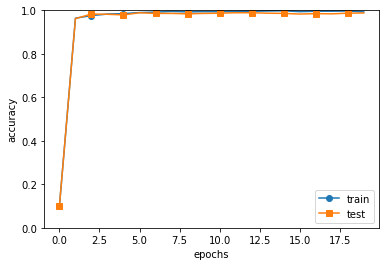

In [31]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [32]:
def filter_show(filters, nx=8, margin=3, scale=10):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i,0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [ ]:
filters[29,0].shape

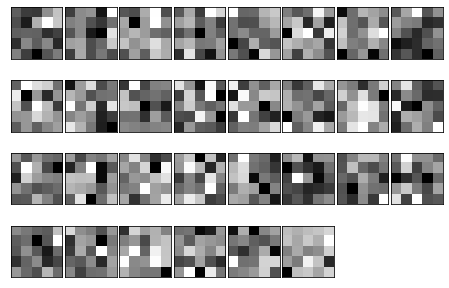

In [33]:
network = SimpleConvNet()
filter_show(network.params['W1'])

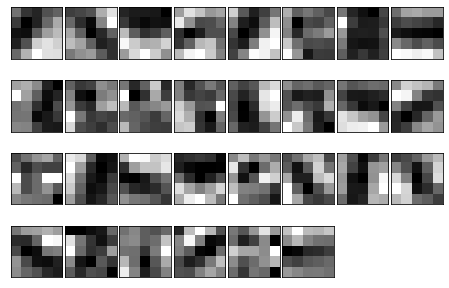

In [34]:
network.load_params('params.pkl')
filter_show(network.params['W1'])